In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [67]:
# Menampilkan informasi awal dataset
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

Statistik Deskriptif:
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.00

In [68]:
# Mendeteksi data duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah duplikasi data: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Data duplikat telah dihapus.\n")

Jumlah duplikasi data: 0


In [69]:
# Mendeteksi data kosong (missing values)
missing_values = df.isnull().sum()
print("Jumlah data kosong per kolom:")
print(missing_values[missing_values > 0])

# Menghapus data kosong jika ada
df = df.dropna()
print("Data kosong telah dihapus.\n")

Jumlah data kosong per kolom:
Series([], dtype: int64)
Data kosong telah dihapus.



In [70]:
numeric_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
    
for column in numeric_columns:
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[z_scores < 3]

In [71]:
# Menyimpan dataset yang telah dibersihkan
df_cleaned.to_csv("Bank Customer Churn Prediction Cleaned.csv", index=False)
print("Dataset setelah pembersihan telah disimpan sebagai 'Bank Customer Churn Prediction Cleaned.csv'.\n")

Dataset setelah pembersihan telah disimpan sebagai 'Bank Customer Churn Prediction Cleaned.csv'.



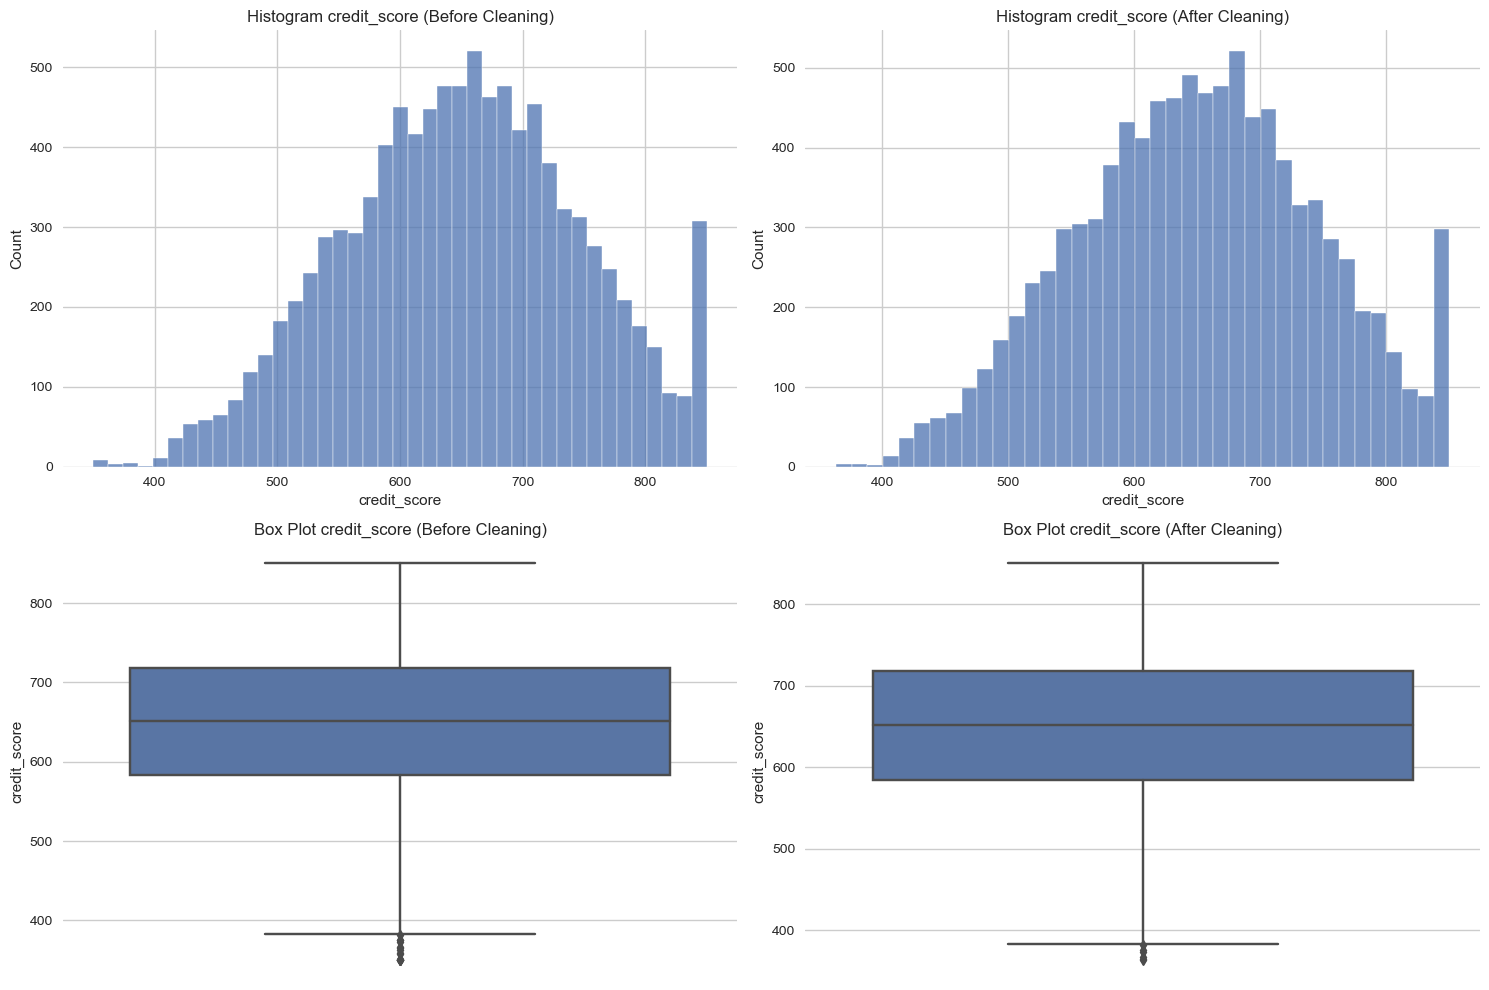

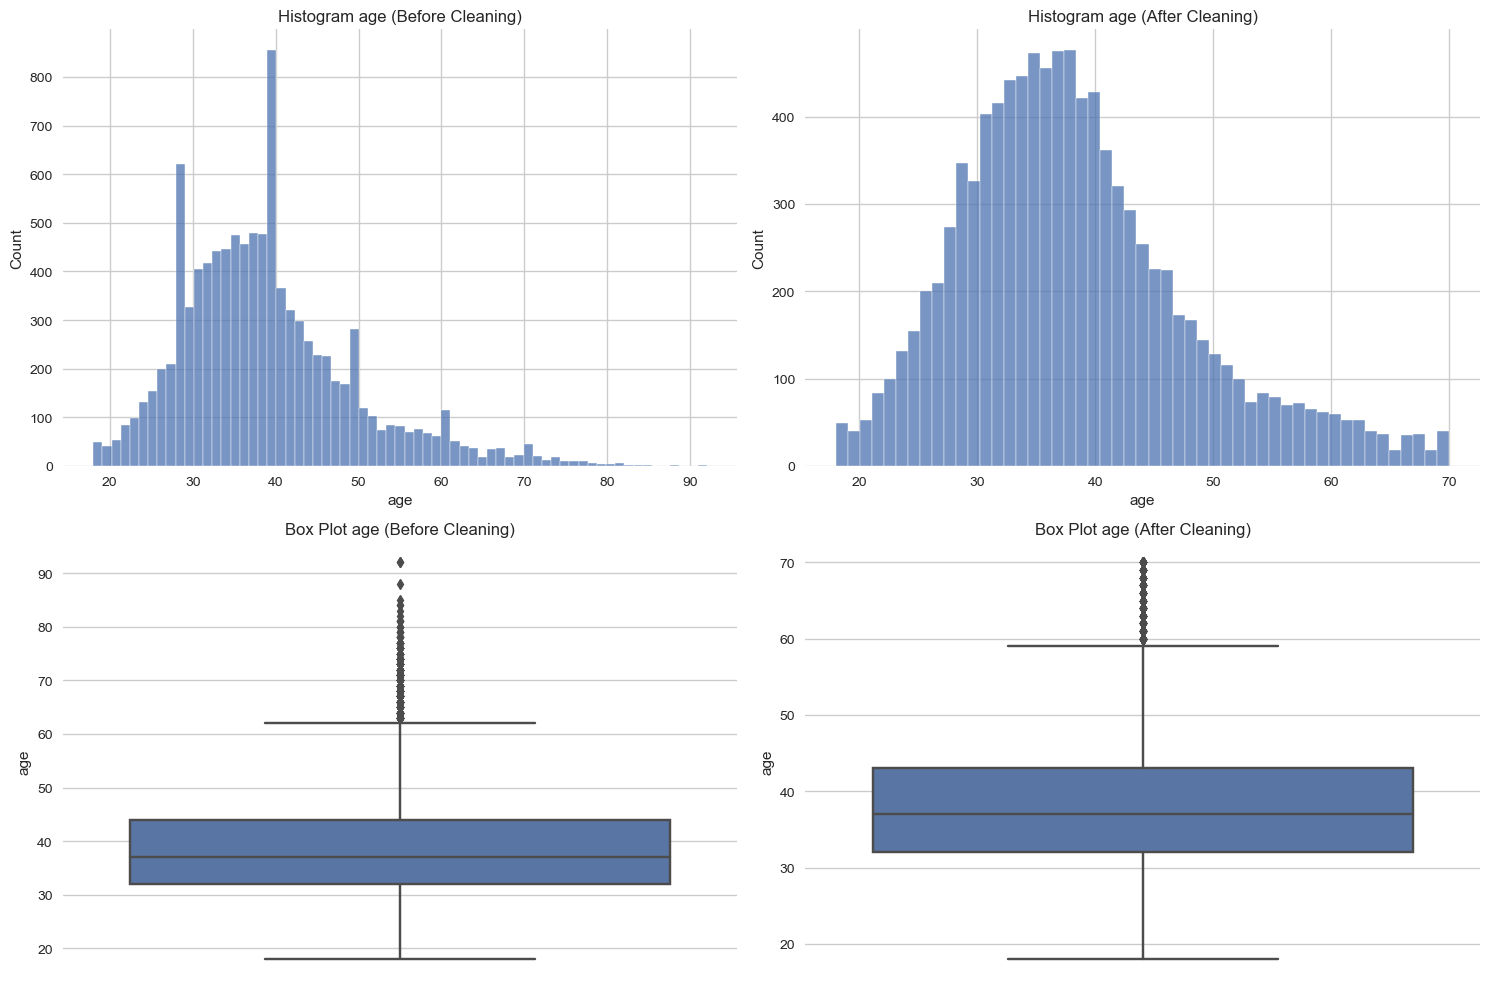

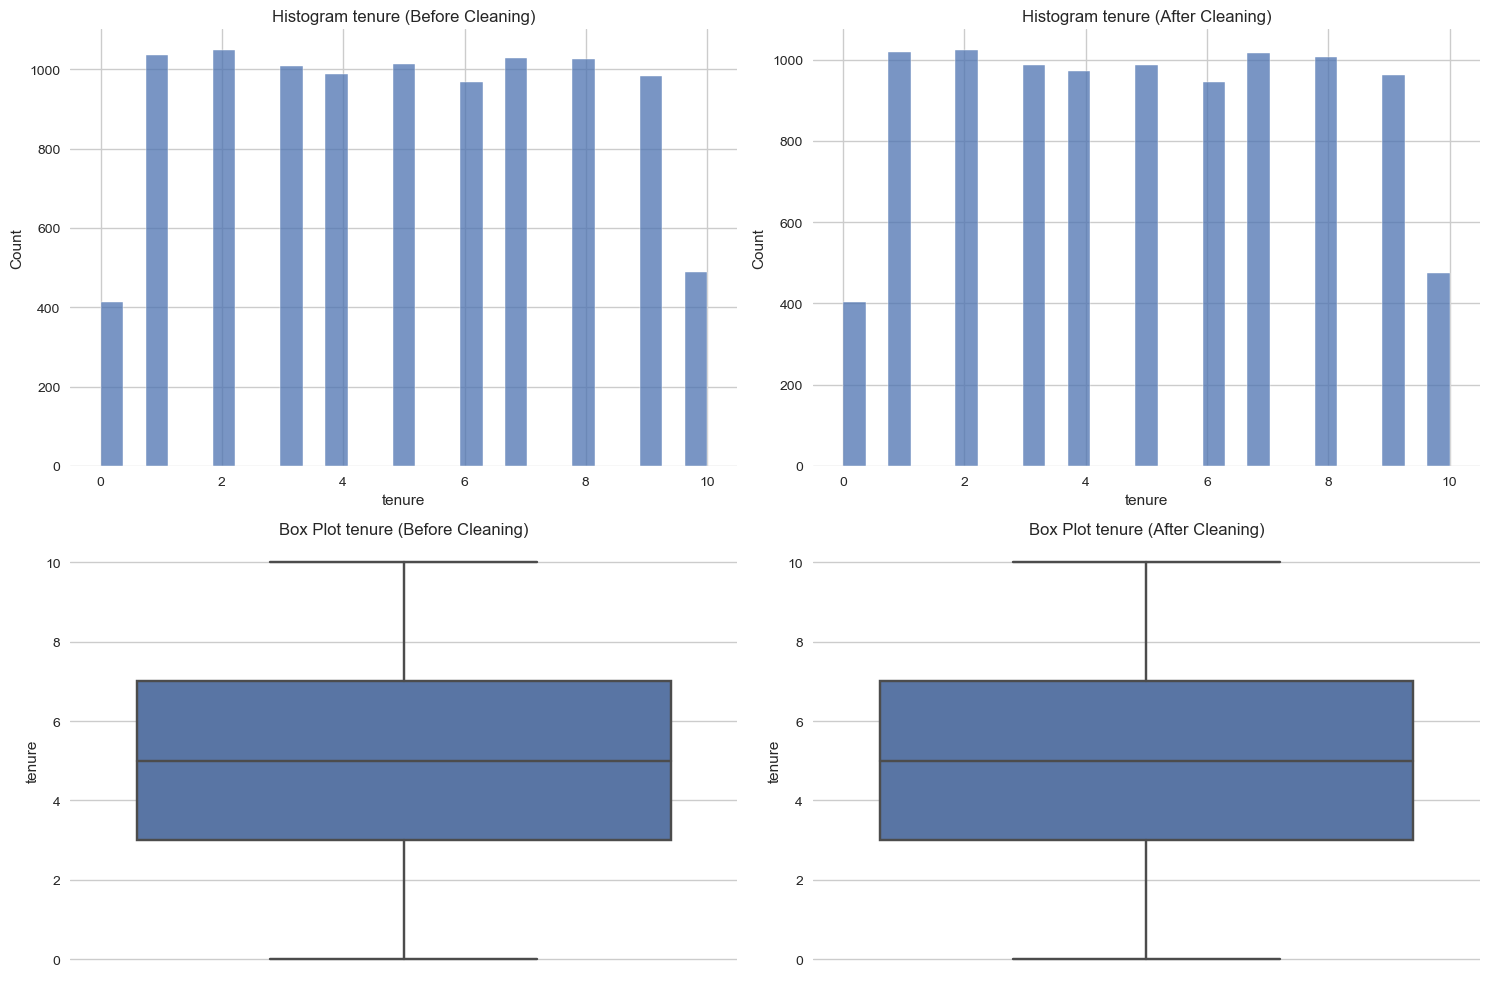

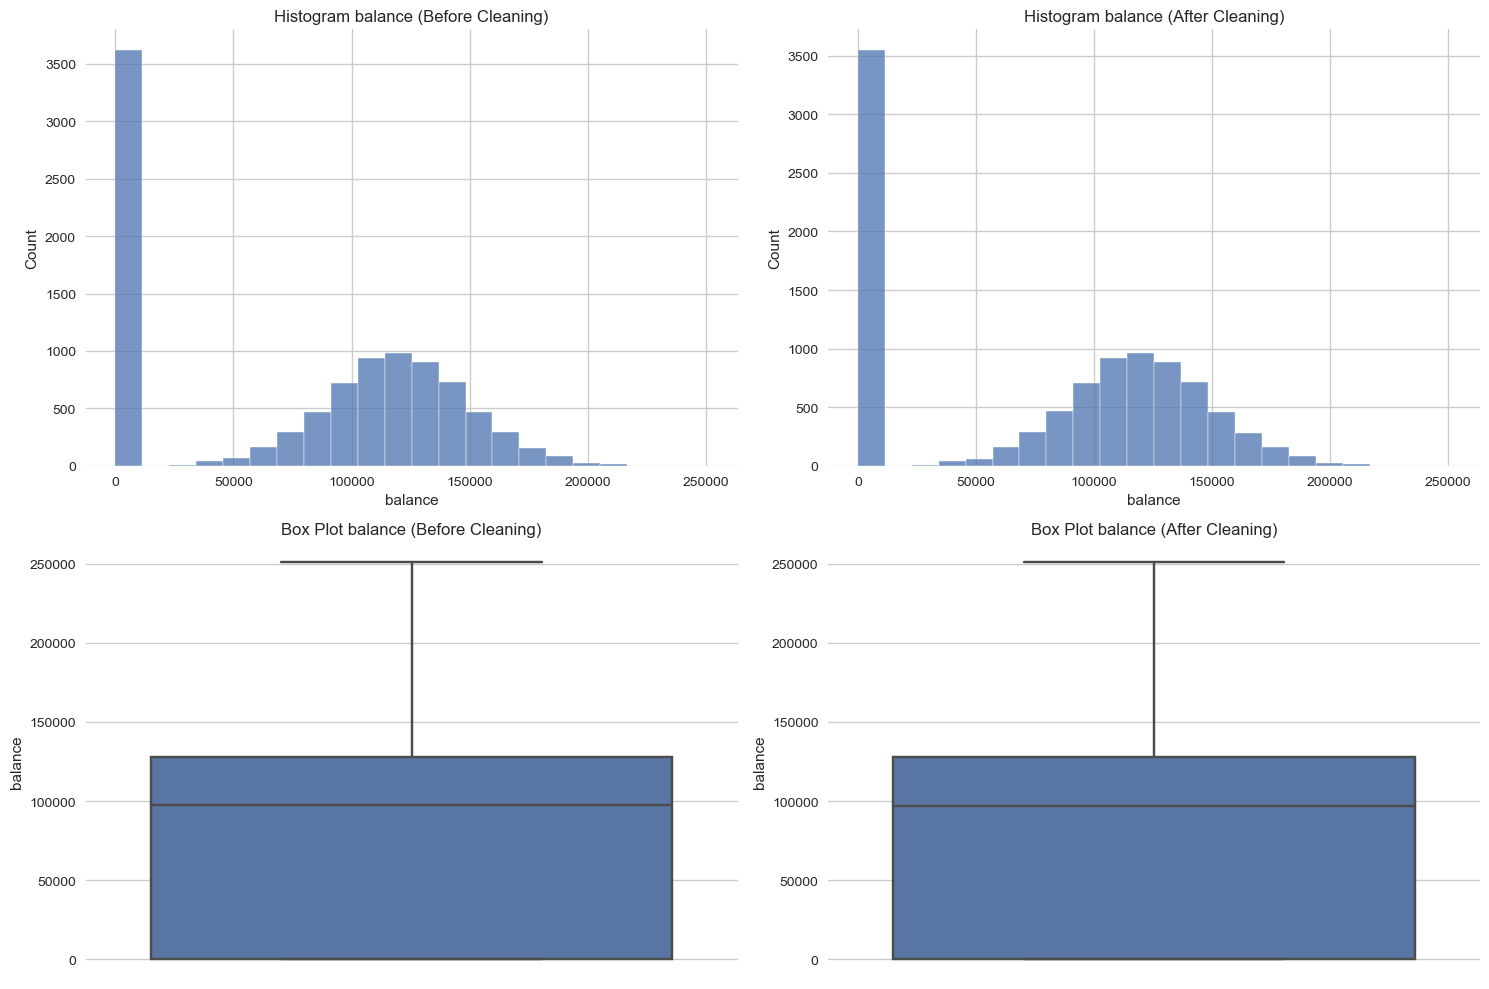

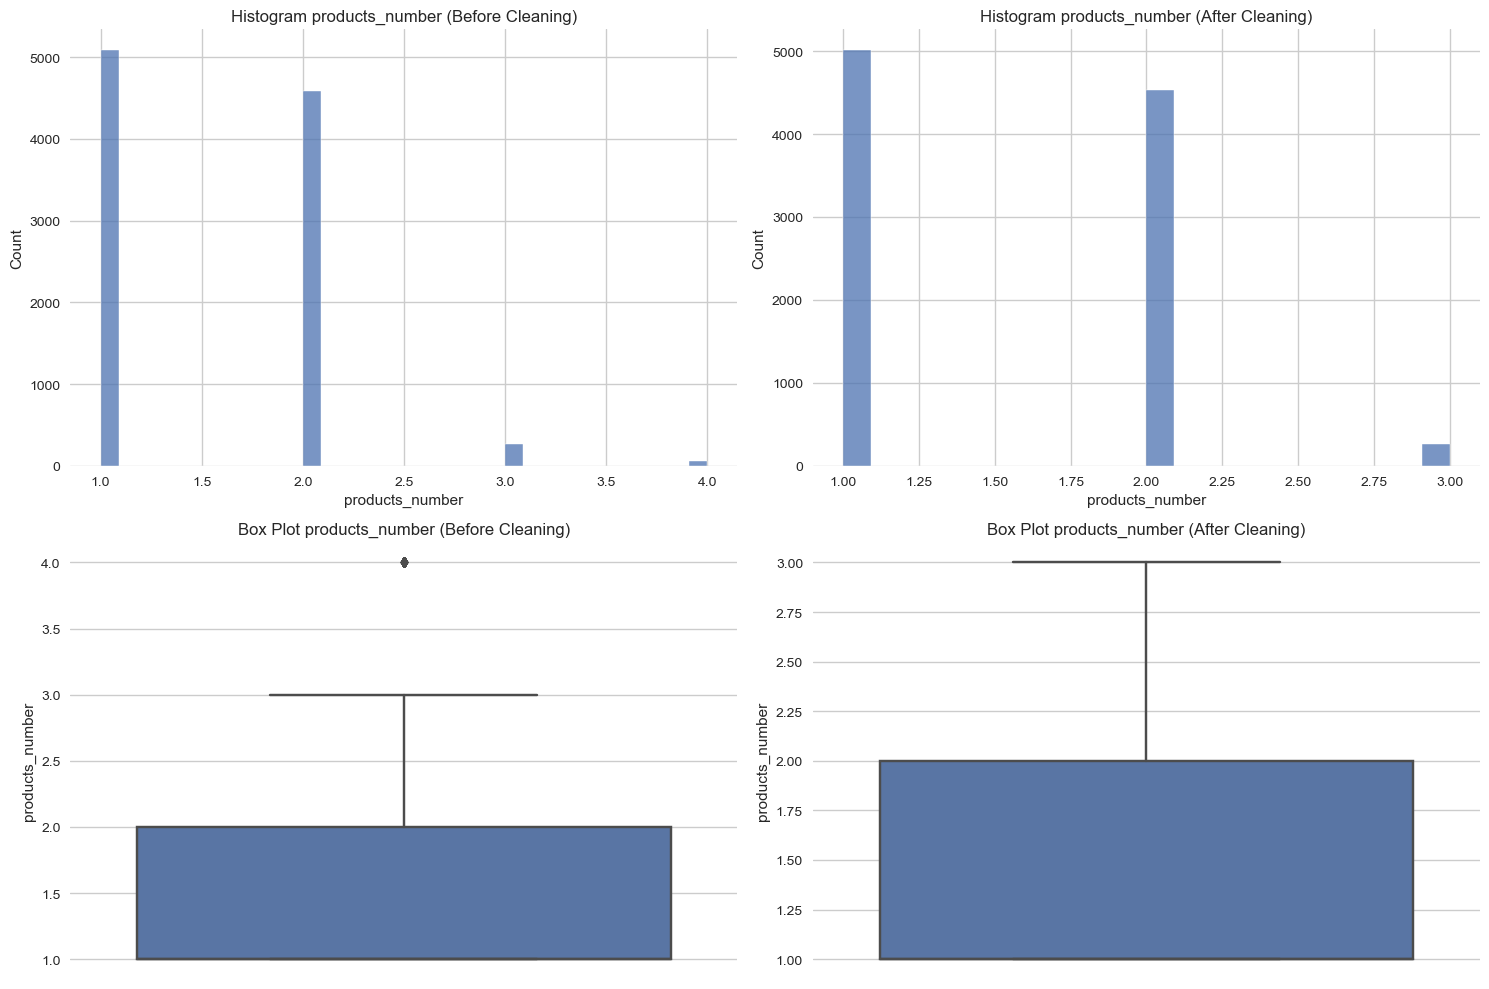

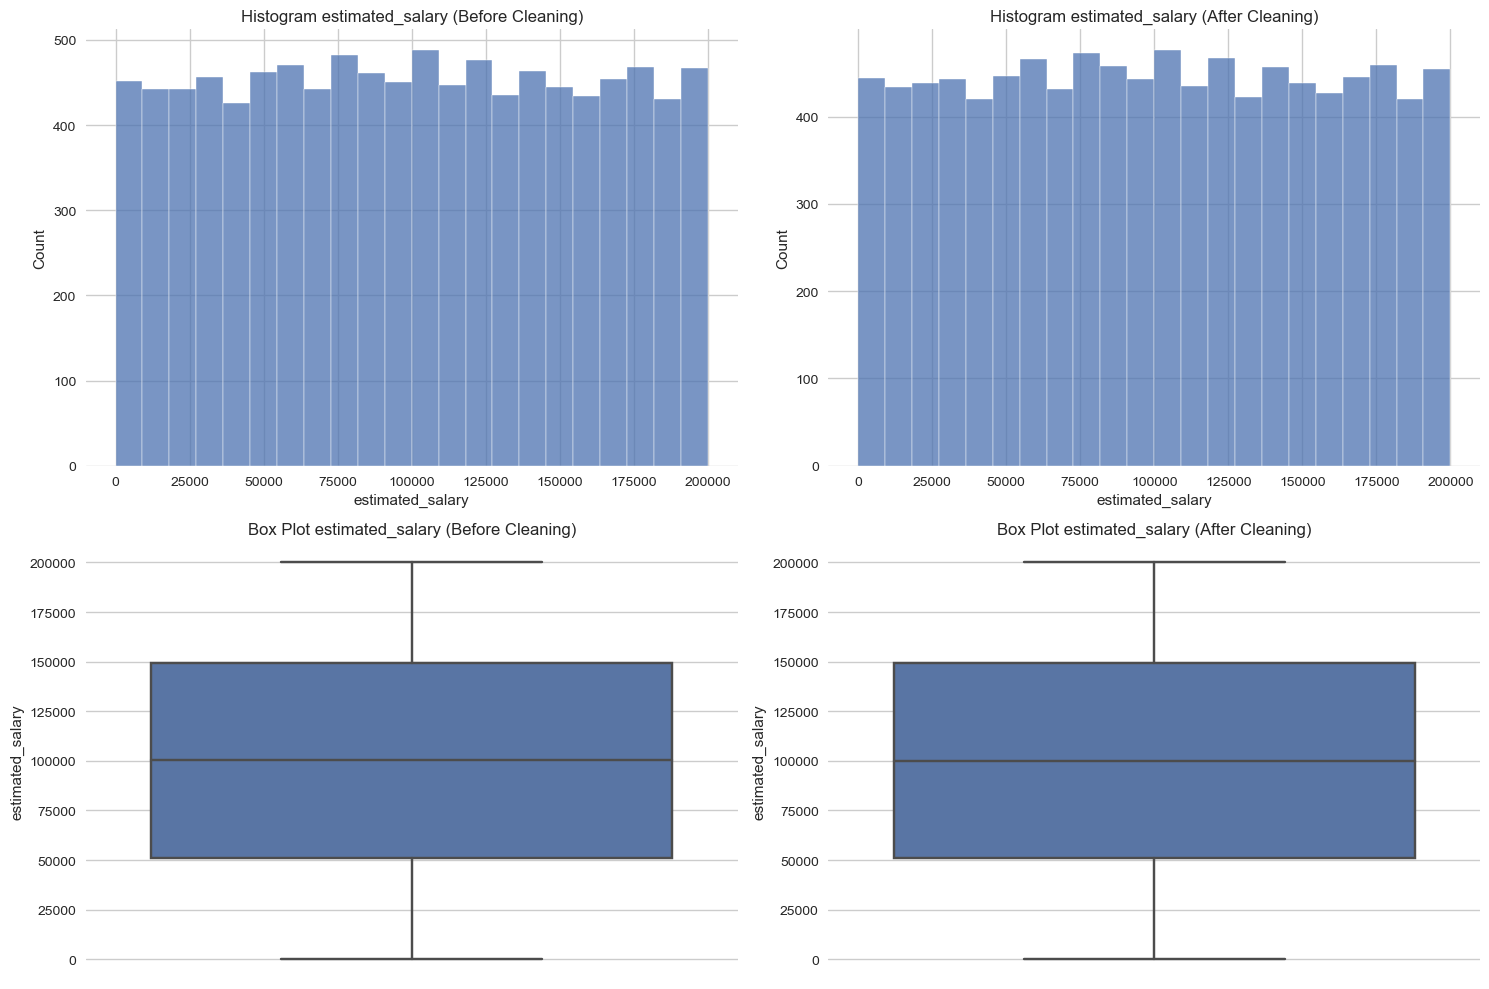

In [72]:
# Visualisasi perbandingan sebelum dan sesudah cleaning
for column in numeric_columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2x2 grid
    
    # Histogram
    sns.histplot(data=df_before, x=column, ax=axes[0, 0])
    axes[0, 0].set_title(f'Histogram {column} (Before Cleaning)')
    
    sns.histplot(data=df, x=column, ax=axes[0, 1])
    axes[0, 1].set_title(f'Histogram {column} (After Cleaning)')
    
    # Box Plot
    sns.boxplot(data=df_before, y=column, ax=axes[1, 0])
    axes[1, 0].set_title(f'Box Plot {column} (Before Cleaning)')
    
    sns.boxplot(data=df, y=column, ax=axes[1, 1])
    axes[1, 1].set_title(f'Box Plot {column} (After Cleaning)')
    
    plt.tight_layout()
    plt.show()

In [73]:
# Data Visualization
# Set style for seaborn
sns.set_style("whitegrid")

# KPI Calculation
total_customers = df.shape[0]
avg_credit_score = df['credit_score'].mean()
avg_balance = df['balance'].mean()
avg_salary = df['estimated_salary'].mean()
max_salary = df['estimated_salary'].max()
churn_rate = df['churn'].mean() * 100

# Print KPI values
print("Total Customers:", total_customers)
print("AVG Credit Score:", avg_credit_score)
print("AVG Balance:", avg_balance)
print("AVG Salary:", avg_salary)
print("Max Salary:", max_salary)
print("Churn Rate Percentage:", churn_rate, "%")

Total Customers: 9799
AVG Credit Score: 650.5866925196449
AVG Balance: 76472.67634656598
AVG Salary: 100029.3597499745
Max Salary: 199992.48
Churn Rate Percentage: 19.98163077865088 %


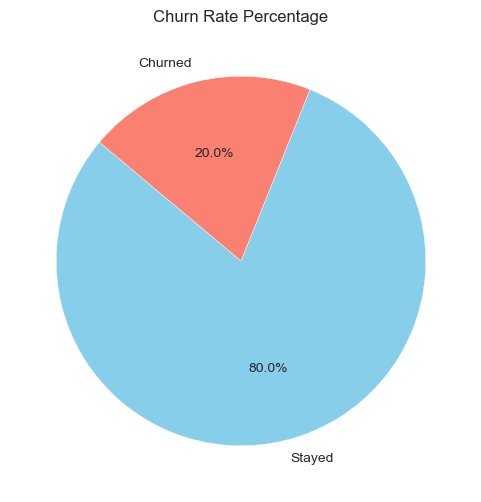

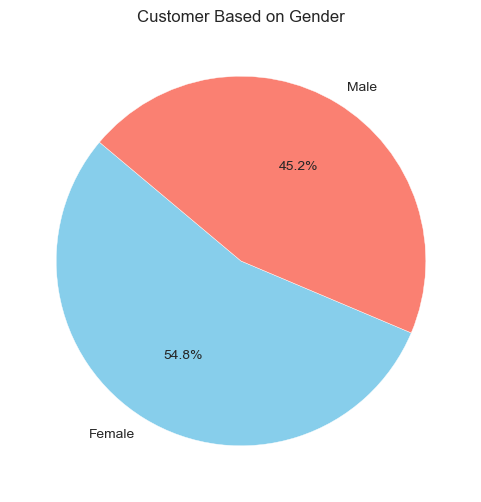

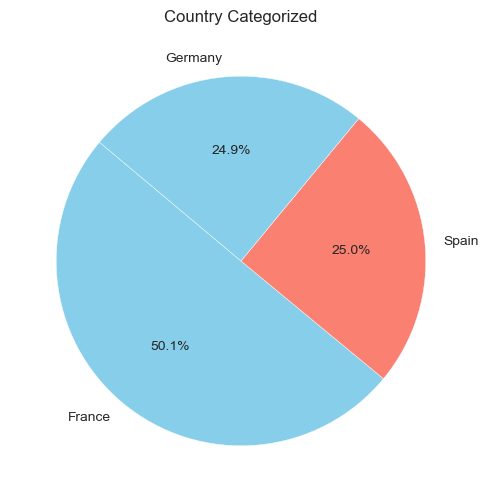

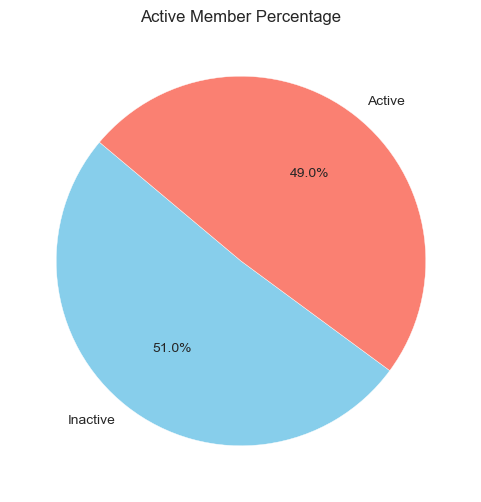

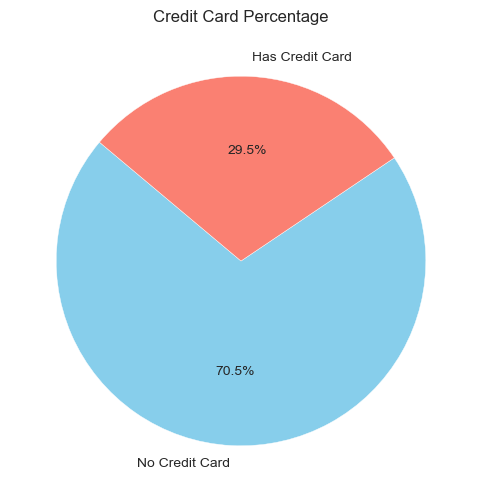

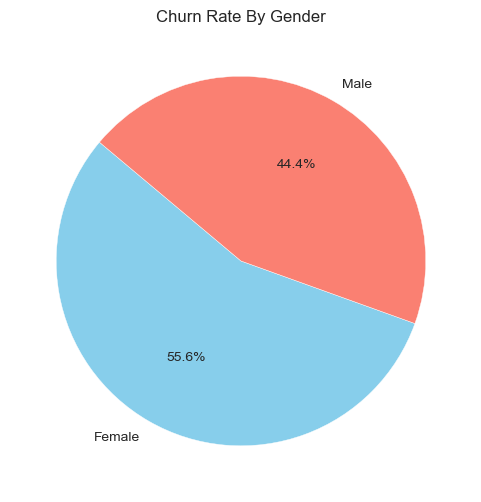

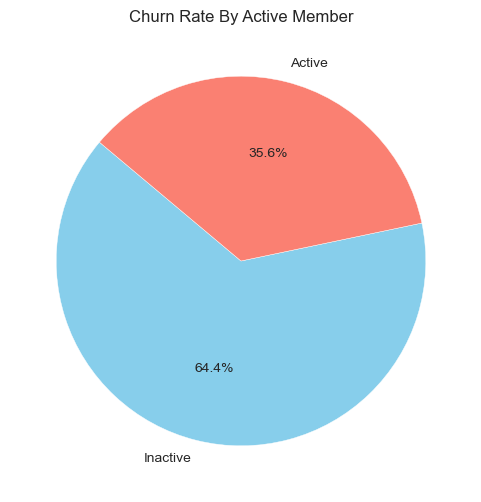

In [74]:
# Pie Charts
def plot_pie_chart(data, labels, title, colors=['skyblue', 'salmon']):
    plt.figure(figsize=(6, 6))
    plt.pie(data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(title)
    plt.show()

# Churn Rate Percentage
plot_pie_chart(df['churn'].value_counts(), ['Stayed', 'Churned'], 'Churn Rate Percentage')

# Customer Based On Gender
plot_pie_chart(df['gender'].value_counts(), df['gender'].unique(), 'Customer Based on Gender')

# Country Categorized
plot_pie_chart(df['country'].value_counts(), df['country'].unique(), 'Country Categorized')

# Active Member Percentage
plot_pie_chart(df['active_member'].value_counts(), ['Inactive', 'Active'], 'Active Member Percentage')

# Credit Card Percentage
plot_pie_chart(df['credit_card'].value_counts(), ['No Credit Card', 'Has Credit Card'], 'Credit Card Percentage')

# Churn Rate By Gender
plot_pie_chart(df[df['churn'] == 1]['gender'].value_counts(), df['gender'].unique(), 'Churn Rate By Gender')

# Churn Rate By Active Member
plot_pie_chart(df[df['churn'] == 1]['active_member'].value_counts(), ['Inactive', 'Active'], 'Churn Rate By Active Member')





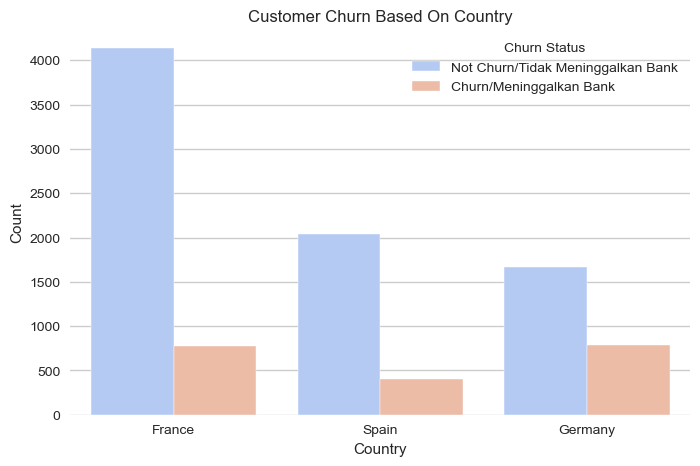

In [75]:
# Customer Churn Based On Country (Bar Plot)
plt.figure(figsize=(8, 5))

# Membuat label custom
hue_labels = {0: "Not Churn/Tidak Meninggalkan Bank", 1: "Churn/Meninggalkan Bank"}

# Plot dengan seaborn
ax = sns.countplot(x='country', hue='churn', data=df, palette='coolwarm')

# Ubah label legend
handles, labels = ax.get_legend_handles_labels()
labels = [hue_labels[int(label)] for label in labels]  # Mapping nilai 0 & 1 ke label custom
ax.legend(handles, labels, title="Churn Status")

# Tambahan styling
plt.title('Customer Churn Based On Country')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()


In [76]:
# Preprocessing Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


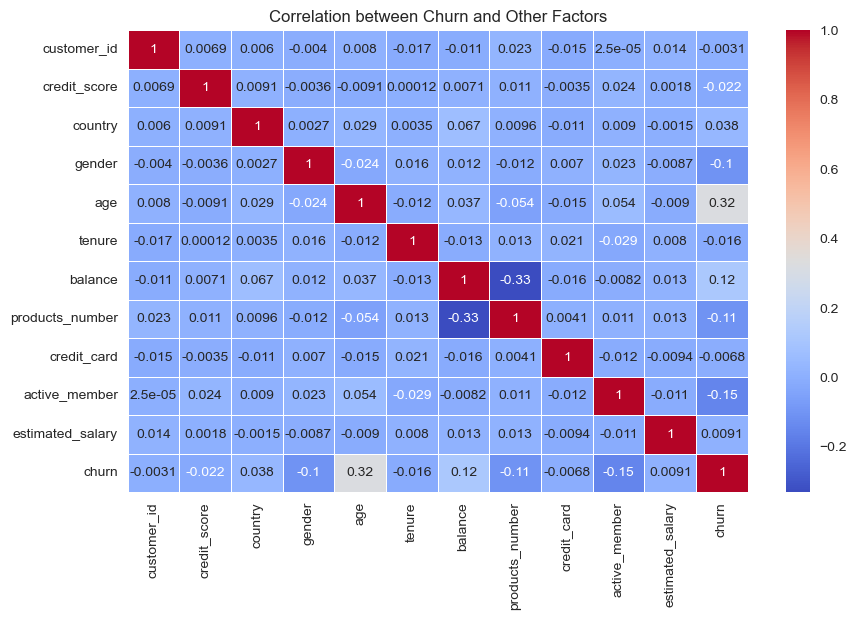

In [77]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Churn and Other Factors')
plt.show()